##### ☕ Coffee Sales Analysis Report

### By Vishu Kumar Banerjee
###

---

### 📌 **Project Overview**
This report provides a comprehensive analysis of coffee sales from a vending machine. It explores revenue trends, customer behaviors, and key sales patterns to support data-driven business decisions.


## 📝 Executive Summary

This report analyzes sales data from a coffee vending machine to uncover customer behavior, sales trends, and product performance.

Key findings include:
- Most sales occur in the **morning hours (9 AM to 11 AM)**, suggesting high demand during typical coffee break times.
- The vending machine generates a **steady revenue stream**, with clear patterns in **best-selling coffee products**.
- **Payment method analysis** shows a preference for card payment.
- **Loyal customers** make repeat purchases, opening up opportunities for customer retention strategies.
- Sales fluctuate throughout the **week and month**, providing insights to optimize promotions and stock levels.

Overall, the data-driven insights suggest actionable strategies to boost sales, improve customer experience, and streamline vending machine operations.

---



### Import libraries and read data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Coffee sales in a vending machine.csv")

In [7]:
df.head() # Quick view of the data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [8]:
df.info() # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3263 non-null   object 
 1   datetime     3263 non-null   object 
 2   cash_type    3263 non-null   object 
 3   card         3174 non-null   object 
 4   money        3263 non-null   float64
 5   coffee_name  3263 non-null   object 
dtypes: float64(1), object(5)
memory usage: 153.1+ KB


## Data cleaning

In [9]:
df["date"]=pd.to_datetime(df["date"])

In [10]:
df["time"] = pd.to_datetime(df["datetime"]).dt.strftime("%H:%M:%S")
df.drop("datetime",axis=1,inplace=True) # Removing the old column

df.drop_duplicates(inplace=True) # Remove duplicates row

In [11]:
df.head()

,date,cash_type,card,money,coffee_name,time
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,10:15:50
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano,13:46:33
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte,13:48:14


## EDA

In [12]:
# Total Revenue and average spending per transaction
print("The total revenue: {:.1f}".format(df["money"].sum()))
print("The average spending: {:.1f}".format(df["money"].mean()))

The total revenue: 103759.1
The average spending: 31.8


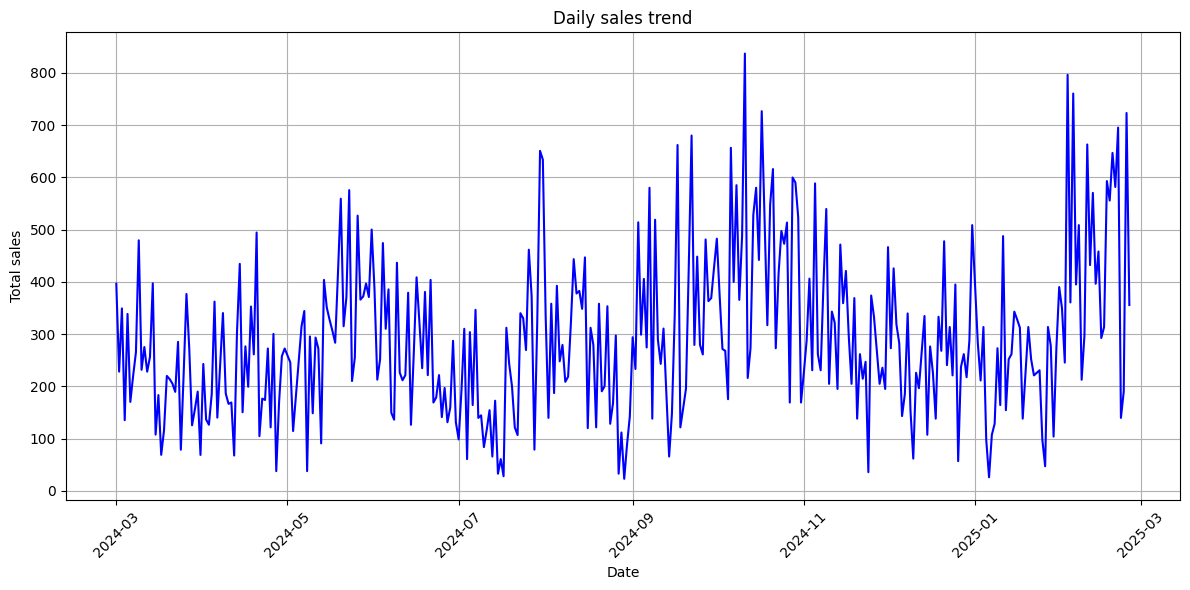

In [13]:
# Daily sales chart
daily_sales = df.groupby("date")["money"].sum()
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values, color='b')
plt.xlabel("Date")
plt.ylabel("Total sales")
plt.title("Daily sales trend")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [14]:
# Best-selling product analysis
df["coffee_name"].value_counts()

,count
coffee_name,
Americano with Milk,764
Latte,714
Americano,459
Cappuccino,452
Cortado,289
Hot Chocolate,256
Cocoa,207
Espresso,122


/tmp/ipython-input-2568925859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["coffee_name"].value_counts().index,y=df["coffee_name"].value_counts().values,palette="mako")


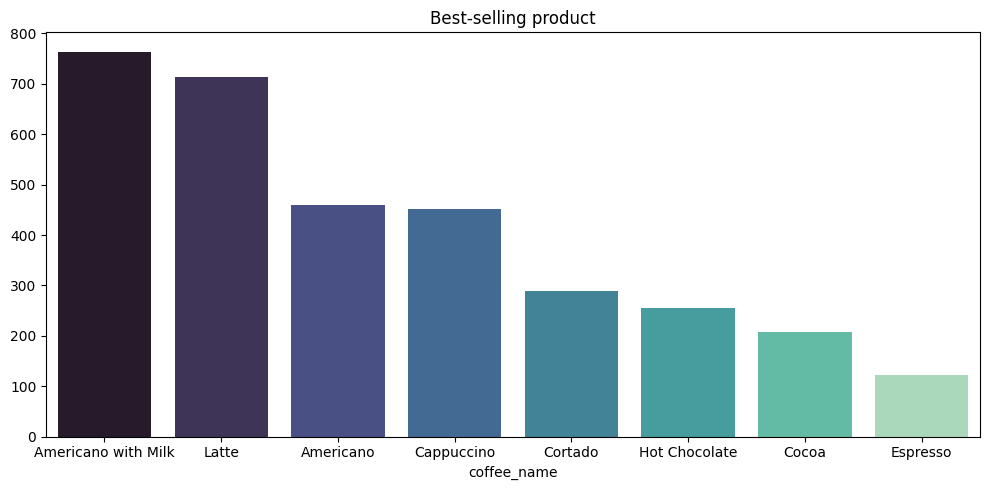

In [15]:
# Best Selling Coffee Chart
plt.figure(figsize=(10,5))
sns.barplot(x=df["coffee_name"].value_counts().index,y=df["coffee_name"].value_counts().values,palette="mako")
plt.title("Best-selling product")
plt.tight_layout()
plt.show()

In [16]:
# Total revenue for each type of coffee
df.groupby("coffee_name")["money"].sum().sort_values(ascending=False)

,money
coffee_name,
Latte,25434.62
Americano with Milk,23417.52
Cappuccino,16281.90
Americano,11973.02
Hot Chocolate,9242.70
Cortado,7456.98
Cocoa,7390.80
Espresso,2561.56


/tmp/ipython-input-2527651174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffee_revenue.index, y=coffee_revenue.values, palette="viridis")


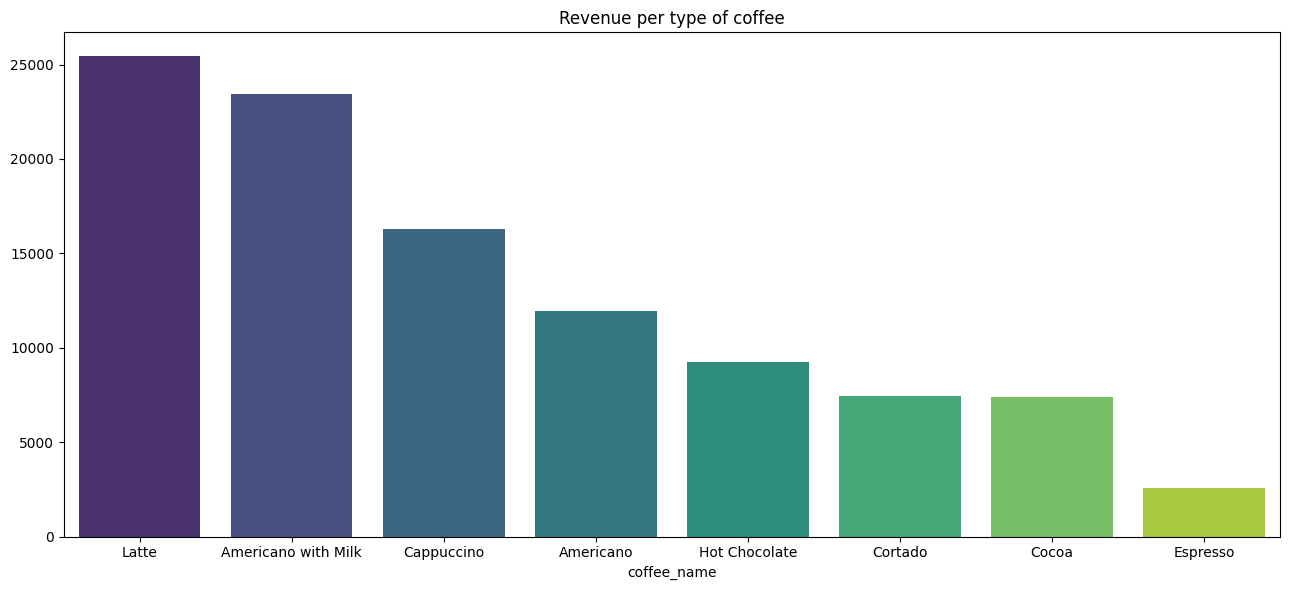

In [17]:
# Revenue chart for each type of coffee.
coffee_revenue = df.groupby("coffee_name")["money"].sum().sort_values(ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=coffee_revenue.index, y=coffee_revenue.values, palette="viridis")
plt.title("Revenue per type of coffee")
plt.tight_layout()
plt.show()

In [18]:
# Payment methods distribution account
df["cash_type"].value_counts()

,count
cash_type,
card,3174
cash,89


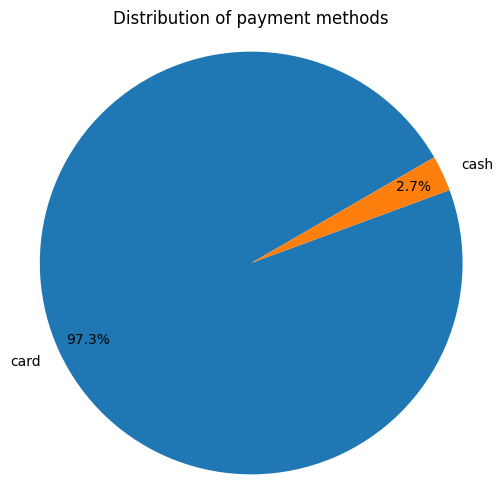

In [19]:
# pie chart of payment methods
plt.figure(figsize=(6,6))
plt.pie(df["cash_type"].value_counts(),labels=df["cash_type"].value_counts().index,
        autopct='%1.1f%%',startangle=30,pctdistance=0.85)
plt.axis('equal')
plt.title("Distribution of payment methods")
plt.show()

In [20]:
# Take the top 10 customers by number of purchases
df["card"].value_counts().head(10)

,count
card,
ANON-0000-0000-0012,129
ANON-0000-0000-0141,108
ANON-0000-0000-0276,69
ANON-0000-0000-0009,67
ANON-0000-0000-0507,50
ANON-0000-0000-0040,50
ANON-0000-0000-0097,47
ANON-0000-0000-1163,46
ANON-0000-0000-0003,31


/tmp/ipython-input-3162428213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="rocket")


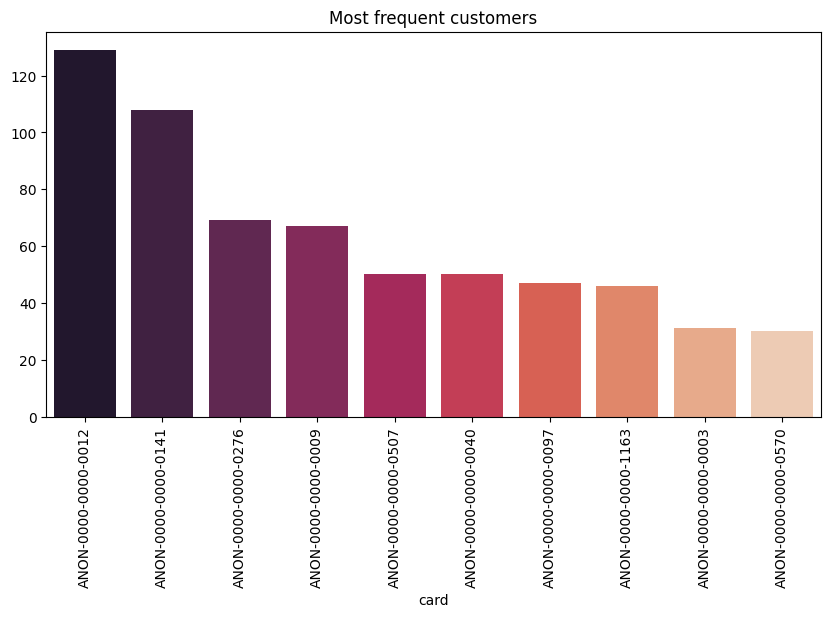

In [21]:
# Chart of repeat customers
top_customers = df["card"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="rocket")
plt.xticks(rotation=90)
plt.title("Most frequent customers")
plt.show()

In [22]:
# Extract hours from `datetime`
df['hour'] = pd.to_datetime(df['time']).dt.hour

# the number of sales per hour
df.groupby("hour").size()

/tmp/ipython-input-1205801465.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


,0
hour,
6,2
7,78
8,212
9,214
10,313
11,263
12,231
13,209
14,201


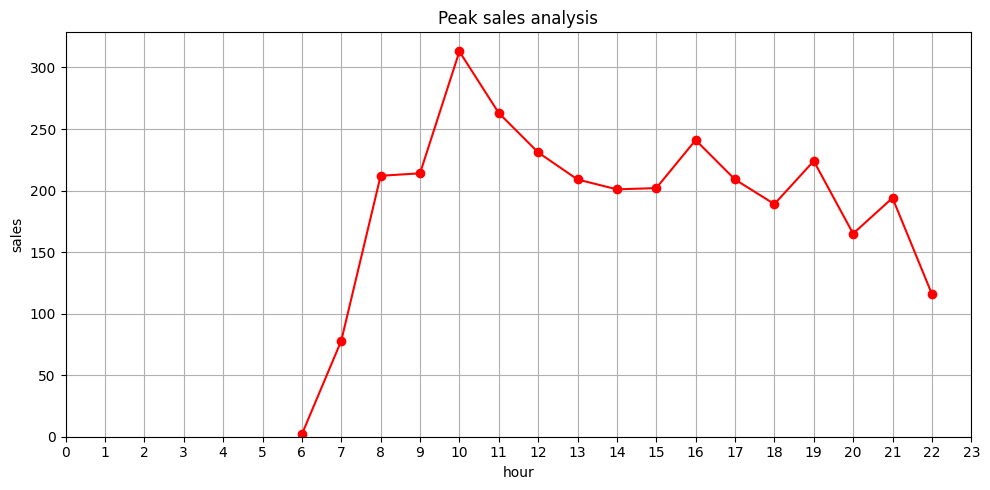

In [23]:
# Peak time chart
plt.figure(figsize=(10,5))
df.groupby("hour").size().plot(marker='o',color='r')
plt.ylabel("sales")
plt.title("Peak sales analysis")
plt.xticks(range(0, 24))
plt.ylim(bottom=0)
plt.grid()
plt.tight_layout()
plt.show()

In [24]:
# Extract days from `date`
df["weekday"]=df["date"].dt.day_name()
# Total sales for each day of the week
df.groupby("weekday")["money"].sum()

,money
weekday,
Friday,14856.94
Monday,16232.18
Saturday,14117.12
Sunday,13062.06
Thursday,14533.22
Tuesday,17193.32
Wednesday,13764.26


In [25]:
# Arrange the days correctly
sales_weekday = df.groupby("weekday")["money"].sum()
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_weekday = sales_weekday.reindex(days_order)

/tmp/ipython-input-886219642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_weekday.index, y=sales_weekday.values, palette="crest")


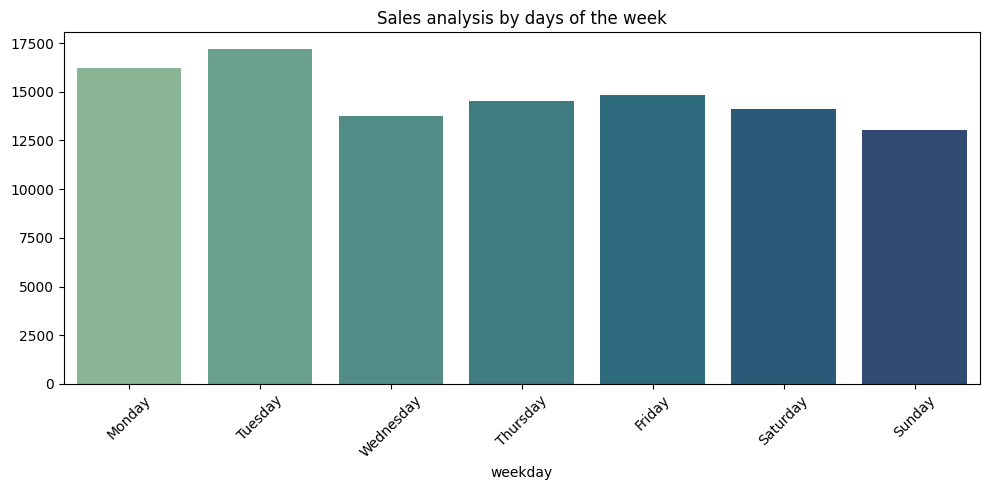

In [26]:
# Sales chart by days of the week
plt.figure(figsize=(10,5))
sns.barplot(x=sales_weekday.index, y=sales_weekday.values, palette="crest")
plt.title("Sales analysis by days of the week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Extract months from `date`
df["month"] = df["date"].dt.month
# Monthly sales
df.groupby("month")["money"].sum()

,money
month,
1,6398.86
2,11529.44
3,7050.20
4,6720.56
5,9063.42
6,7758.76
7,6915.94
8,7613.84
9,9988.64


/tmp/ipython-input-3019364148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(sales_monthly,palette="Spectral")


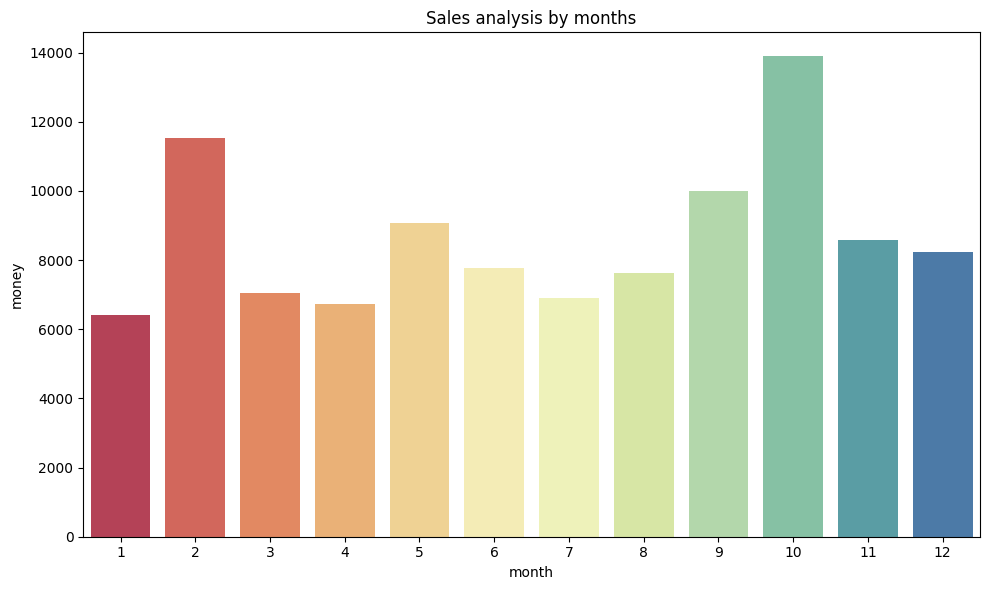

In [28]:
# Sales chart by months
sales_monthly = df.groupby("month")["money"].sum()
plt.figure(figsize=(10,6))
sns.barplot(sales_monthly,palette="Spectral")
plt.title("Sales analysis by months")
plt.tight_layout()
plt.show()

In [29]:
# Classify transactions into morning (before 12 o'clock) or evening
df["Am or Pm"] = df["hour"].apply(lambda x : "Pm" if x>=12 else "Am")
# Sales account for each period
df.groupby("Am or Pm")["money"].sum()

,money
Am or Pm,
Am,33154.36
Pm,70604.74


/tmp/ipython-input-2186499344.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(period, palette="pastel")


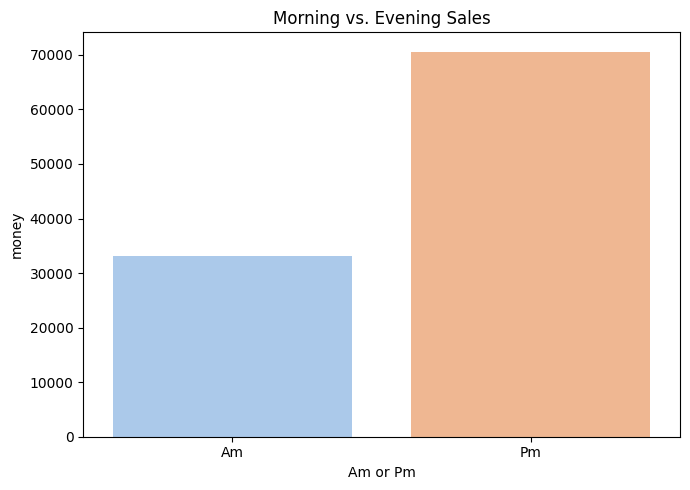

In [30]:
# Sales chart for morning and evening
period = df.groupby("Am or Pm")["money"].sum()
plt.figure(figsize=(7,5))
sns.barplot(period, palette="pastel")
plt.title("Morning vs. Evening Sales")
plt.tight_layout()
plt.show()

## 📊 Conclusion & Key Insights

- The **total revenue** generated by the coffee vending machine is significant, with an average transaction amount that shows healthy customer spending behavior.
- The **best-selling product** is clearly identified through frequency analysis, allowing for better inventory management and restocking decisions.
- The **daily sales trend** shows that certain days consistently outperform others, with noticeable spikes on specific weekdays.
- **Peak sales hours** indicate that most customers make purchases during the morning rush (especially around 9-11 AM), which aligns with typical coffee consumption behavior.
- **Payment method distribution** reveals a preference pattern, with card payment being the dominant mode.
- A small group of **loyal/repeat customers** is responsible for a significant portion of sales, suggesting potential for targeted loyalty programs.
- **Monthly sales analysis** highlights seasonal trends or fluctuations that could guide promotional campaigns.
- **Morning vs. Evening sales** comparison shows whether your machine performs better in the AM or PM, helping with service and restocking schedules.

---

> 📌 **Next Steps / Recommendations:**
>
> - Consider offering promotions during non-peak hours to balance the sales load.
> - Analyze customer cards further to identify demographics behind loyal customers.
> - Monitor the least popular products to assess if they should be replaced or promoted differently.
